In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


/Users/pkim/Dropbox/Projects/SpringAccel


In [2]:

# Imports
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
am_i_local = "yes"
if am_i_local == "yes":
    try:
        os.chdir(os.path.join(os.getcwd(), '../SpringAccel'))
        print(os.getcwd())
    except:
        pass
from IPython.display import display

pd.options.display.max_columns = None

csv_input = 'files/LA-1a.csv'
csv_output = 'files/LA-1b.csv'

/Users/pkim/Dropbox/Projects/SpringAccel


In [3]:
#Read in dataset 
# Readin file from 1a 
df = pd.read_csv(csv_input)




/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,17,20,28,33,34,44,57,60,69,71,72,73,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Drop weird column 
try: 
       df.drop('Unnamed: 0', axis=1, inplace=True)
except: 
       print("Dropping column didn't work")
df.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019031e+13,2019-03-07,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,NaN,NaN,https://a0.muscache.com/im/pictures/40618141/2...,NaN,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\r\nLiterary Manager.\r\r\nPhotograph...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,NaN,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,2019-03-07,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,NaN
1,5728,https://www.airbnb.com/rooms/5728,2.019031e+13,2019-03-07,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Do you want to live in paradise? We have a ver...,Our home is located near Venice Beach without ...,none,Our neighborhood is very quiet and save. There...,Please be respectful to our neighbors since Ai...,You can park right in front of our home if you...,You can hang out in our garden or on the sun d...,Helene is managing our Home while we are in Ge...,- Please agree to the following house rules ...,NaN,NaN,https://a0.muscache.com/im/pictures/7a29d275-f...,NaN,9171,https://www.airbnb.com/users/show/9171

In [5]:
df['isPlus'] = df['isPlus'].apply(lambda x: 1 if x == 1 else 0)

df.columns



Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'uid', 'isPlus'],
      dtype='object', length=108)

In [6]:


# creates new popluation where it's either Plus listings or Superhost listings
population = df[(df['isPlus'] == 1) | (df['host_is_superhost'] == 't')]



In [7]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019031e+13,2019-03-07,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,NaN,NaN,https://a0.muscache.com/im/pictures/40618141/2...,NaN,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\r\nLiterary Manager.\r\r\nPhotograph...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,NaN,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,2019-03-07,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [8]:
cols_to_drop = ['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url','medium_url',
                'picture_url','xl_picture_url','host_url','host_name','host_location','host_about',
                'host_thumbnail_url', 'host_picture_url','host_neighbourhood','street','neighbourhood',
                'neighbourhood_group_cleansed','city','state','market','smart_location','country_code',
                'country_code','calendar_last_scraped','jurisdiction_names','uid'
               ]

In [9]:
population.drop(cols_to_drop, axis=1).head(1)

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,zipcode,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,isPlus
0,2708,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,3008,2008-09-16,within an hour,100%,NaN,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Hollywood,90046,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",NaN,$79.00,$399.00,$949.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,0


In [10]:
# Missing cols removal 
num_rows = len(population)
for col_name in population.columns:
    na_tot = sum(population[col_name].isna())
    if na_tot/num_rows > 0.5:
        print(col_name, ": ", str(na_tot/num_rows))
        population.drop(col_name,axis=1,inplace=True)

thumbnail_url :  1.0
medium_url :  1.0
xl_picture_url :  1.0
host_acceptance_rate :  1.0
neighbourhood_group_cleansed :  1.0


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


square_feet :  0.9908444371781248
weekly_price :  0.8461538461538461
monthly_price :  0.8543284558162347
license :  0.9650944167416006


In [11]:
population.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,2708,https://www.airbnb.com/rooms/2708,2.019031e+13,2019-03-07,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,https://a0.muscache.com/im/pictures/40618141/2...,3008,https://www.airbnb.com/users/show/3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\r\nLiterary Manager.\r\r\nPhotograph...,within an hour,100%,t,https://a0.muscache.com/im/pictures/user/d17cf...,https://a0.muscache.com/im/pictures/user/d17cf...,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,2019-03-07,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [12]:
col_no_url_scrape = [col for col in population.columns if "url" not in col and 'scrape' not in col]
population = population[col_no_url_scrape]

In [13]:
population.head(1)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,2708,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",Writer.\r\r\nLiterary Manager.\r\r\nPhotograph...,within an hour,100%,t,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [14]:
text_cols = ['name','summary','space','description',
             'neighborhood_overview','notes','transit',
             'access','interaction','house_rules','host_about'
            ]
id_cols = ['id','host_id','host_name']
nlp_dataset = population[text_cols + id_cols]

In [15]:
nlp_dataset.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_about,id,host_id,host_name
0,Gold Memory Foam Bed & Breakfast in West Holly...,Our best memory foam pillows you'll ever sleep...,Flickering fireplace display heater. Decorate...,Our best memory foam pillows you'll ever sleep...,We are minutes away from the Mentor Language I...,Decorated for the Holidays. Blendtec® Designer...,There are many buses; bus stops going in every...,"Kitchen with new refrigerator, dishwasher, sto...",I am friendly and available to help you with y...,I just have one rule. The Golden Rule Do unto ...,Writer.\r\r\nLiterary Manager.\r\r\nPhotograph...,2708,3008,Chas.


In [16]:
nlp_dataset.to_csv('LA_nlp_ds.csv',index=False)

In [17]:
population.drop(text_cols+id_cols, axis=1 ,inplace = True)

In [18]:
population.head(1)

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,none,2008-09-16,"Los Angeles, California, United States",within an hour,100%,t,Hollywood,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood,Hollywood,Los Angeles,CA,90046,Los Angeles,"Los Angeles, CA",US,United States,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,15.0,7.0,2014-06-09,2019-02-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,"{""City of Los Angeles"","" CA""}",t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [19]:
# only latitude and longitude will stay cause they can be scaled
# The other location columns need to be removed if model wants to be used for 
# other markets
location_cols = ['host_location','host_neighbourhood' ,'street','neighbourhood',
                'neighbourhood_cleansed','city','state','zipcode','market','smart_location',
                'country_code','country','jurisdiction_names']
time_cols = ['host_since','first_review','last_review']

population.drop(location_cols+time_cols, axis=1,inplace = True)


In [20]:
population.head(1)

,experiences_offered,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,none,within an hour,100%,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,t,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [21]:
constant_cols = []
for cols in population.columns:
    if len(population[cols].unique()) == 1:
        print(cols)
        constant_cols.append(cols)
population.drop(constant_cols, axis=1, inplace=True)

experiences_offered
has_availability
is_business_travel_ready


In [22]:
population.head(1)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,within an hour,100%,t,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,34.09768,-118.34602,t,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,strict_14_with_grace_period,f,f,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [23]:
for cols in population.columns:
    if len(population[cols].unique()) == 2:
        print(cols, population[cols].unique())
        if 't' in population[cols].unique():
            population[cols] = population[cols].apply(lambda x: 1 if x =='t' else 0)[1]



host_is_superhost ['t' 'f']
host_has_profile_pic ['t' 'f']
host_identity_verified ['t' 'f']
is_location_exact ['t' 'f']
requires_license ['f' 't']
instant_bookable ['t' 'f']
require_guest_profile_picture ['f' 't']
require_guest_phone_verification ['f' 't']
isPlus [0 1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [24]:
population.head(1)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,within an hour,100%,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,0,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


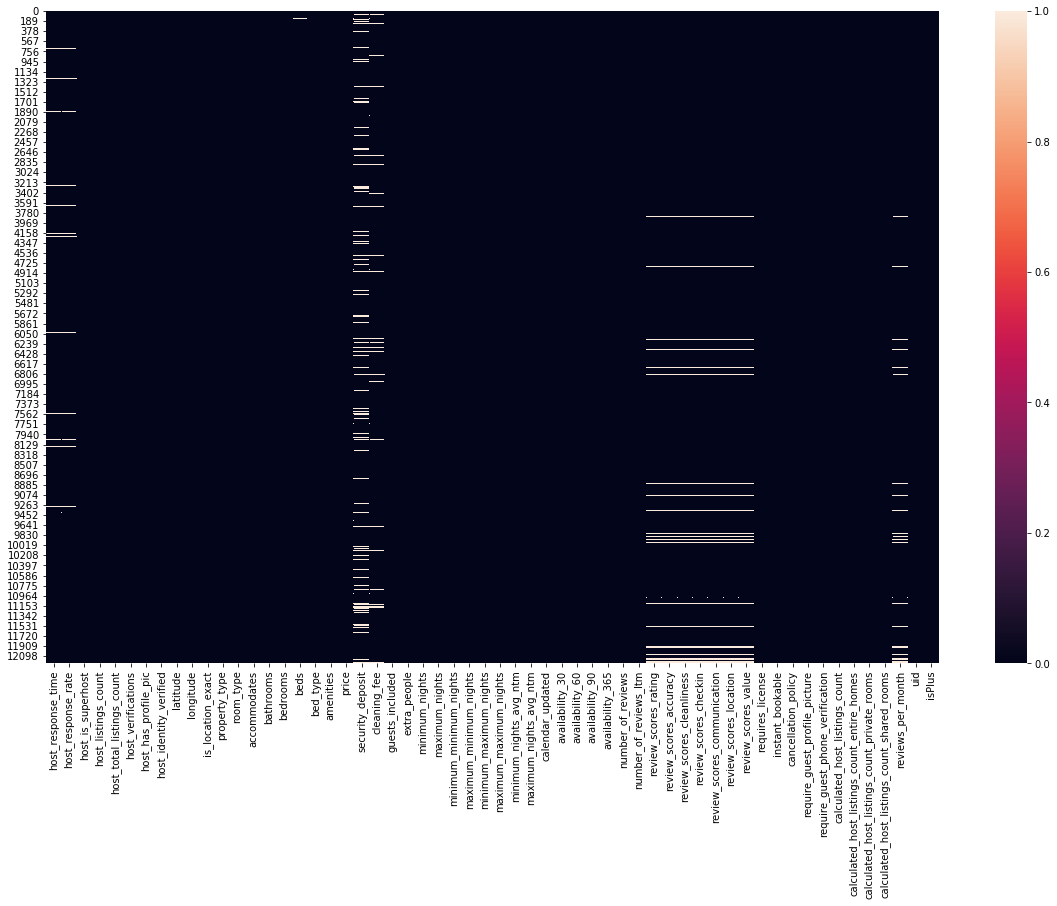

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(population.isna())



## Missing Imputation 
### Beds

In [26]:
population['beds'].dropna().unique()

array(['1.0', '2.0', '3.0', '5.0', '0.0', '4.0', '7.0', '11.0', '10.0',
       '6.0', '9.0', '8.0', '13.0', '14.0', '15.0', '16.0', '19.0',
       '12.0', '22.0', 3.0, 1.0, 0.0, 4.0, 2.0, 5.0, 6.0, 7.0, 10.0, 8.0,
       12.0, 11.0, 13.0, 15.0, 14.0, 9.0, 21.0], dtype=object)

In [27]:
population['beds'] = pd.to_numeric(population['beds'])

(array([9.538e+03, 2.031e+03, 4.640e+02, 1.290e+02, 3.900e+01, 2.000e+01,
        5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

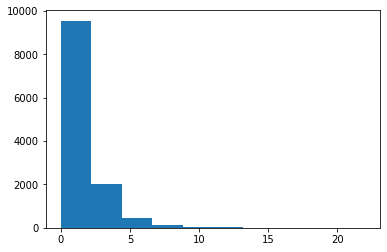

In [28]:
plt.hist(population['beds'].dropna())

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [30]:
Imputer = IterativeImputer()

In [31]:
population['beds'].loc[population['beds'].isna()]

148   NaN
876   NaN
Name: beds, dtype: float64

In [32]:
Imputer.fit_transform(population['beds'].values.reshape(1,-1))

array([[1., 1., 2., ..., 5., 7., 2.]])

In [33]:
Imputer.fit_transform(population['reviews_per_month'].values.reshape(1,-1))

array([[0.26, 1.95, 1.29, ..., 2.  , 1.  , 1.  ]])

In [34]:
population.head(1)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,within an hour,100%,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,0,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$299.00,$85.00,1.0,$0.00,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [35]:
# Fixing money problems 
money = ['price','security_deposit','cleaning_fee','extra_people']
for col in money:    
    population[col]=population[col].apply(lambda x: -1 if str(x)[:1] != "$" else x)
    population[col]=population[col].apply(lambda x: float(str(x)[1:].replace(',',"")
                                                         ) if len(str(x))>1 else float(-1) )


In [36]:
population[money]

,price,security_deposit,cleaning_fee,extra_people
0,79.0,299.0,85.0,0.0
1,75.0,100.0,25.0,15.0
2,105.0,150.0,50.0,15.0
3,303.0,200.0,100.0,15.0
4,99.0,300.0,89.0,0.0
5,80.0,1.0,25.0,25.0
6,75.0,100.0,40.0,5.0
7,129.0,1.0,45.0,45.0
8,121.0,0.0,52.0,0.0
9,90.0,1.0,35.0,0.0


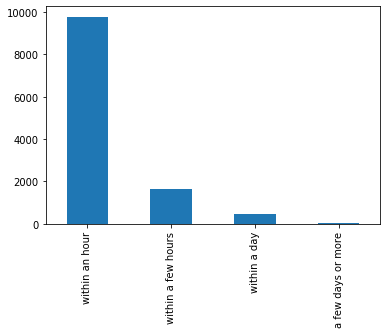

In [37]:
population['host_response_time'].value_counts().plot(kind="bar")

In [38]:
population['host_response_time'] = population['host_response_time'].apply(lambda x: str(x) if str(x) != "nan" else "within an hour")

In [39]:
population['host_response_rate'] = population['host_response_rate'].apply(lambda x: int(str(x)[:-1]) if str(x)[-1]=="%" else -1)

In [40]:
review_missing = []
for col in [cols for cols in population.columns if "review" in cols]:
    if sum(population[col].isna()) > 0:
        review_missing.append(col)
        print(sum(population[col].isna()))

632
633
633
637
635
637
637
629


In [41]:
review_missing

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [42]:
population[review_missing]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.26
1,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1.95
2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.29
3,91.0,10.0,10.0,10.0,10.0,9.0,9.0,0.80
4,96.0,10.0,9.0,10.0,10.0,9.0,9.0,0.10
5,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.61
6,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1.78
7,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.86
8,94.0,10.0,10.0,10.0,10.0,10.0,9.0,3.28
9,95.0,10.0,10.0,10.0,10.0,10.0,10.0,4.91


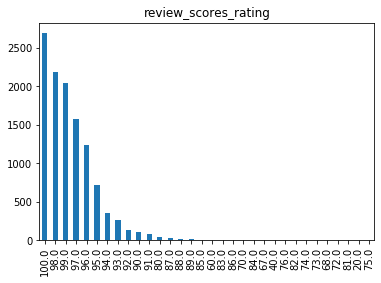

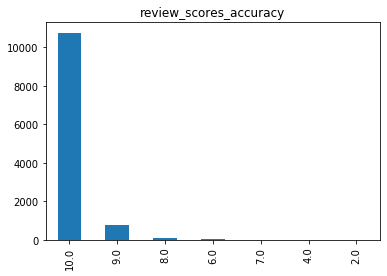

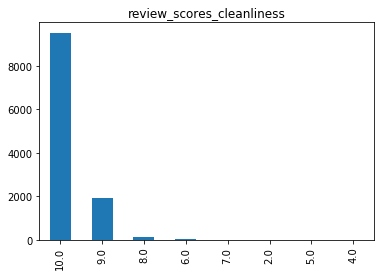

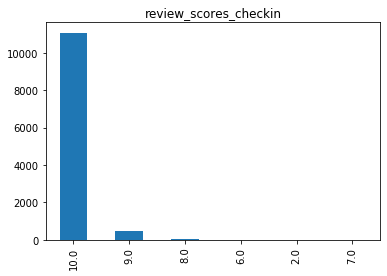

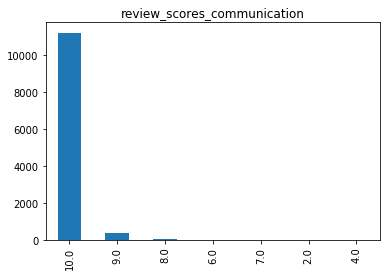

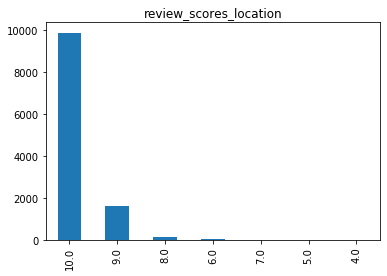

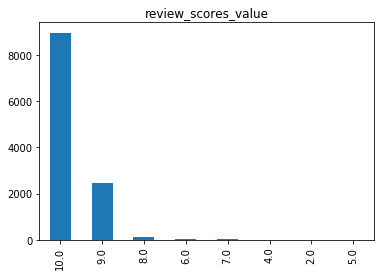

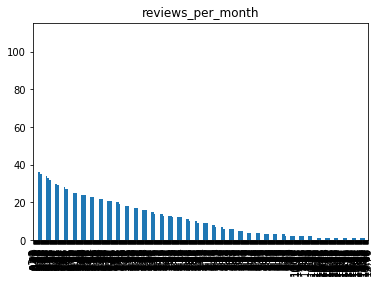

In [43]:
for col in review_missing:
    fig = plt.figure()
    plt.title(col)
    population[col].dropna().value_counts().plot(kind="bar")

(array([4.865e+03, 3.384e+03, 1.956e+03, 9.190e+02, 3.140e+02, 1.130e+02,
        3.100e+01, 1.100e+01, 7.000e+00, 4.000e+00]),
 array([1.0000e-02, 1.7670e+00, 3.5240e+00, 5.2810e+00, 7.0380e+00,
        8.7950e+00, 1.0552e+01, 1.2309e+01, 1.4066e+01, 1.5823e+01,
        1.7580e+01]),
 <a list of 10 Patch objects>)

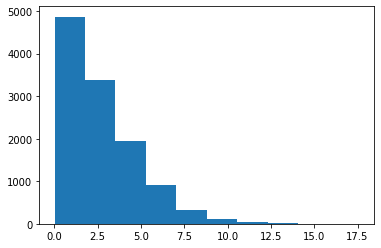

In [44]:
plt.hist(population['reviews_per_month'].dropna())

In [45]:
population.head(1)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,within an hour,100,1,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,0,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79.0,299.0,85.0,1.0,0.0,5.0,366,5.0,5,366,366,5.0,366.0,3 days ago,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [46]:
population.select_dtypes(include = 'object')

,host_response_time,host_listings_count,host_total_listings_count,host_verifications,property_type,room_type,bed_type,amenities,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,cancellation_policy,uid
0,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",366,5,366,366,5.0,366.0,3 days ago,strict_14_with_grace_period,Chas.|Gold Memory Foam Bed & Breakfast in West...
1,within an hour,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Tiny house,Private room,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",14,1,14,14,1.0,14.0,today,moderate,Sanni|Tiny Home in Artistic Oasis near Venice ...
2,within an hour,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Guesthouse,Private room,Airbed,"{Internet,Wifi,""Free street parking"",Heating,""...",29,1,29,29,1.0,29.0,today,moderate,Sanni|Zen Room with Floating Bed near Venice a...
3,within an hour,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",House,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Free street parking"",H...",1120,1,1120,1120,1.0,1120.0,today,moderate,Sanni|Artist Oasis near Venice Beach w/ Beauti...
4,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",366,6,366,366,6.0,366.0,2 weeks ago,strict_14_with_grace_period,Chas.|Off Sunset Wrap-Around Terr Runyon Canyo...
5,within a few hours,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",365,2,365,365,2.0,365.0,a week ago,strict_14_with_grace_period,Leilani & Ova & Nouthak|15min from anywhere in...
6,within an hour,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1250,1,1250,1250,1.0,1250.0,today,moderate,"Tom|Quiet Retreat, Home Away fr Home/Close2Att..."
7,within an hour,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",49,2,49,49,2.0,49.0,3 months ago,moderate,Sher|5-Star Beverly Hills Suite
8,within a few hours,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",22,3,22,22,3.0,22.0,a week ago,strict_14_with_grace_period,Lillian|Cozy Guest House on Venice Walk St.
9,within an hour,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",Loft,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",1125,2,1125,1125,2.0,1125.0,4 weeks ago,moderate,Wendell|City Place Lofts


In [47]:
to_float = ['host_listings_count','host_total_listings_count','maximum_nights',
           'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
           'minimum_nights_avg_ntm','maximum_nights_avg_ntm']

for cols in to_float: 
    population[cols] = population[cols].astype(float)


In [48]:
population.select_dtypes(include = 'object')

,host_response_time,host_verifications,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy,uid
0,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",3 days ago,strict_14_with_grace_period,Chas.|Gold Memory Foam Bed & Breakfast in West...
1,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",Tiny house,Private room,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",today,moderate,Sanni|Tiny Home in Artistic Oasis near Venice ...
2,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",Guesthouse,Private room,Airbed,"{Internet,Wifi,""Free street parking"",Heating,""...",today,moderate,Sanni|Zen Room with Floating Bed near Venice a...
3,within an hour,"['email', 'phone', 'facebook', 'reviews', 'off...",House,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Free street parking"",H...",today,moderate,Sanni|Artist Oasis near Venice Beach w/ Beauti...
4,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Private room,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",2 weeks ago,strict_14_with_grace_period,Chas.|Off Sunset Wrap-Around Terr Runyon Canyo...
5,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'kba']",Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",a week ago,strict_14_with_grace_period,Leilani & Ova & Nouthak|15min from anywhere in...
6,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,moderate,"Tom|Quiet Retreat, Home Away fr Home/Close2Att..."
7,within an hour,"['email', 'phone', 'facebook', 'reviews', 'jum...",Apartment,Private room,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",3 months ago,moderate,Sher|5-Star Beverly Hills Suite
8,within a few hours,"['email', 'phone', 'reviews', 'kba']",Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi...",a week ago,strict_14_with_grace_period,Lillian|Cozy Guest House on Venice Walk St.
9,within an hour,"['email', 'phone', 'facebook', 'reviews', 'kba']",Loft,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4 weeks ago,moderate,Wendell|City Place Lofts


In [51]:
population.select_dtypes(include = 'float')

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,2.0,34.09768,-118.34602,1.0,1.5,1.0,1.0,79.0,299.0,85.0,1.0,0.0,5.0,366.0,5.0,5.0,366.0,366.0,5.0,366.0,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,0.26
1,4.0,4.0,33.98833,-118.43224,2.0,1.0,1.0,1.0,75.0,100.0,25.0,1.0,15.0,1.0,14.0,1.0,1.0,14.0,14.0,1.0,14.0,10.0,35.0,63.0,129.0,229.0,91.0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,1.95
2,4.0,4.0,33.98685,-118.43266,3.0,1.0,1.0,2.0,105.0,150.0,50.0,2.0,15.0,1.0,29.0,1.0,1.0,29.0,29.0,1.0,29.0,6.0,16.0,22.0,101.0,149.0,72.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,1.0,3.0,0.0,1.29
3,4.0,4.0,33.98782,-118.43170,5.0,1.0,2.0,2.0,303.0,200.0,100.0,2.0,15.0,1.0,1120.0,1.0,1.0,1120.0,1120.0,1.0,1120.0,3.0,15.0,45.0,94.0,76.0,42.0,91.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,1.0,3.0,0.0,0.80
4,2.0,2.0,34.09521,-118.34801,1.0,1.5,1.0,1.0,99.0,300.0,89.0,1.0,0.0,6.0,366.0,6.0,6.0,366.0,366.0,6.0,366.0,0.0,2.0,30.0,304.0,12.0,1.0,96.0,10.0,9.0,10.0,10.0,9.0,9.0,2.0,0.0,2.0,0.0,0.10
5,1.0,1.0,34.03475,-118.37751,2.0,1.0,1.0,1.0,80.0,1.0,25.0,2.0,25.0,2.0,365.0,2.0,2.0,365.0,365.0,2.0,365.0,0.0,0.0,4.0,95.0,192.0,43.0,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,1.61
6,2.0,2.0,34.11543,-118.26090,4.0,1.0,1.0,2.0,75.0,100.0,40.0,2.0,5.0,1.0,1250.0,1.0,1.0,1250.0,1250.0,1.0,1250.0,8.0,17.0,27.0,217.0,159.0,66.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,2.0,0.0,0.0,1.78
7,1.0,1.0,34.06410,-118.38030,2.0,1.0,1.0,1.0,129.0,1.0,45.0,2.0,45.0,2.0,49.0,2.0,2.0,49.0,49.0,2.0,49.0,0.0,22.0,52.0,231.0,220.0,13.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.86
8,1.0,1.0,33.99399,-118.45637,2.0,1.0,0.0,1.0,121.0,0.0,52.0,1.0,0.0,3.0,22.0,3.0,3.0,22.0,22.0,3.0,22.0,22.0,48.0,74.0,337.0,371.0,23.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3.28
9,1.0,1.0,33.77206,-118.18893,2.0,1.5,1.0,1.0,90.0,1.0,35.0,1.0,0.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,12.0,36.0,57.0,57.0,360.0,39.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,4.91


In [59]:
sum(population['host_listings_count'] !=
    population['host_total_listings_count']) 




0

In [60]:
population.drop('host_total_listings_count',axis=1,inplace=True)

In [61]:
population.head(1)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,uid,isPlus
0,within an hour,100,1,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,0,34.09768,-118.34602,1,Apartment,Private room,1.0,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",79.0,299.0,85.0,1.0,0.0,5.0,366.0,5.0,5.0,366.0,366.0,5.0,366.0,3 days ago,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,strict_14_with_grace_period,0,0,2.0,0.0,2.0,0.0,0.26,Chas.|Gold Memory Foam Bed & Breakfast in West...,0


In [62]:
population.select_dtypes(include = 'float')

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,34.09768,-118.34602,1.0,1.5,1.0,1.0,79.0,299.0,85.0,1.0,0.0,5.0,366.0,5.0,5.0,366.0,366.0,5.0,366.0,12.0,16.0,16.0,16.0,15.0,7.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,0.0,2.0,0.0,0.26
1,4.0,33.98833,-118.43224,2.0,1.0,1.0,1.0,75.0,100.0,25.0,1.0,15.0,1.0,14.0,1.0,1.0,14.0,14.0,1.0,14.0,10.0,35.0,63.0,129.0,229.0,91.0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,4.0,1.0,3.0,0.0,1.95
2,4.0,33.98685,-118.43266,3.0,1.0,1.0,2.0,105.0,150.0,50.0,2.0,15.0,1.0,29.0,1.0,1.0,29.0,29.0,1.0,29.0,6.0,16.0,22.0,101.0,149.0,72.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,4.0,1.0,3.0,0.0,1.29
3,4.0,33.98782,-118.43170,5.0,1.0,2.0,2.0,303.0,200.0,100.0,2.0,15.0,1.0,1120.0,1.0,1.0,1120.0,1120.0,1.0,1120.0,3.0,15.0,45.0,94.0,76.0,42.0,91.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,1.0,3.0,0.0,0.80
4,2.0,34.09521,-118.34801,1.0,1.5,1.0,1.0,99.0,300.0,89.0,1.0,0.0,6.0,366.0,6.0,6.0,366.0,366.0,6.0,366.0,0.0,2.0,30.0,304.0,12.0,1.0,96.0,10.0,9.0,10.0,10.0,9.0,9.0,2.0,0.0,2.0,0.0,0.10
5,1.0,34.03475,-118.37751,2.0,1.0,1.0,1.0,80.0,1.0,25.0,2.0,25.0,2.0,365.0,2.0,2.0,365.0,365.0,2.0,365.0,0.0,0.0,4.0,95.0,192.0,43.0,94.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,1.0,0.0,0.0,1.61
6,2.0,34.11543,-118.26090,4.0,1.0,1.0,2.0,75.0,100.0,40.0,2.0,5.0,1.0,1250.0,1.0,1.0,1250.0,1250.0,1.0,1250.0,8.0,17.0,27.0,217.0,159.0,66.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0,2.0,0.0,0.0,1.78
7,1.0,34.06410,-118.38030,2.0,1.0,1.0,1.0,129.0,1.0,45.0,2.0,45.0,2.0,49.0,2.0,2.0,49.0,49.0,2.0,49.0,0.0,22.0,52.0,231.0,220.0,13.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,1.86
8,1.0,33.99399,-118.45637,2.0,1.0,0.0,1.0,121.0,0.0,52.0,1.0,0.0,3.0,22.0,3.0,3.0,22.0,22.0,3.0,22.0,22.0,48.0,74.0,337.0,371.0,23.0,94.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3.28
9,1.0,33.77206,-118.18893,2.0,1.5,1.0,1.0,90.0,1.0,35.0,1.0,0.0,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,12.0,36.0,57.0,57.0,360.0,39.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,1.0,0.0,4.91


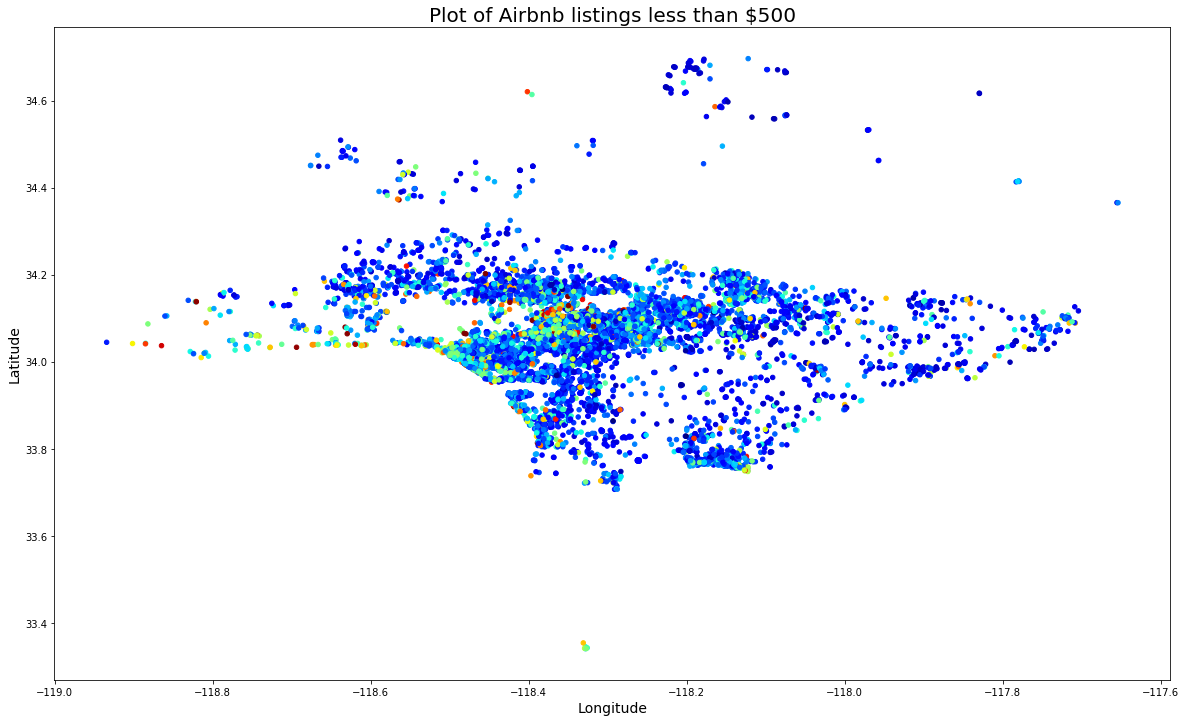

In [113]:

pop_500 = population[(population['price']<500)]
ax = pop_500.plot(kind="scatter",
           x='longitude',y='latitude',
           c='price', 
           cmap=plt.get_cmap('jet'),colorbar=False,
           figsize=(20,12)
           ).set_xlabel("Longitude", fontsize=14)
plt.title("Plot of Airbnb listings less than $500",fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

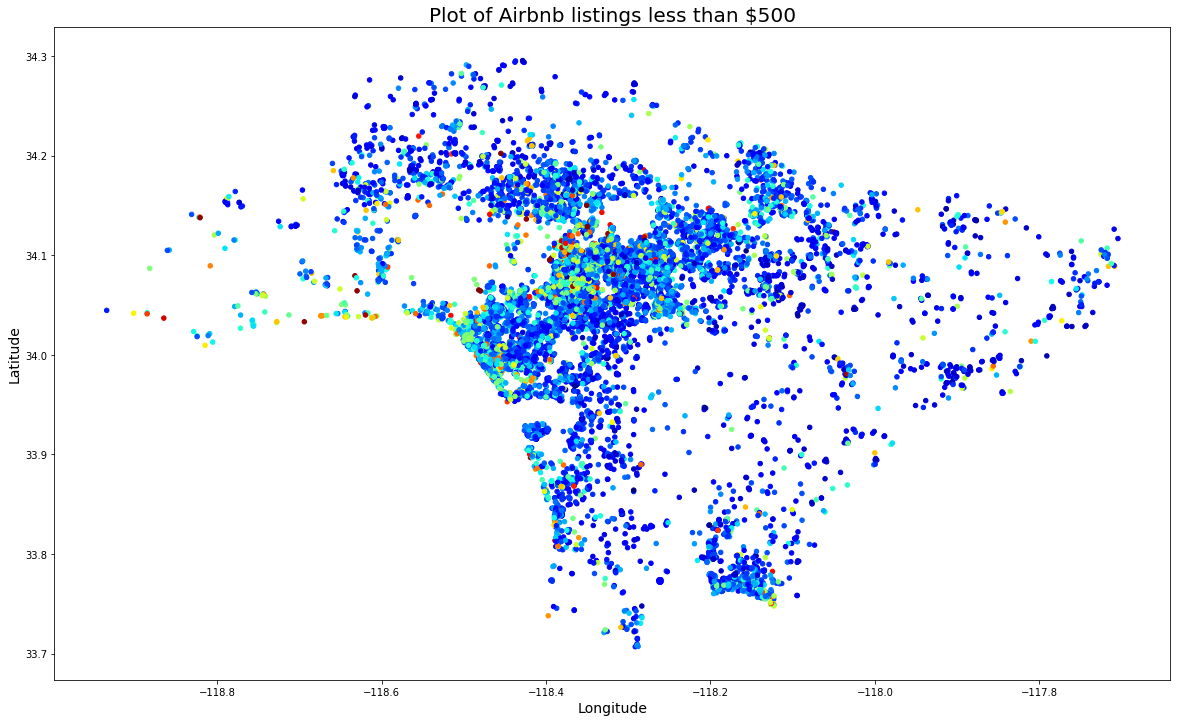

In [118]:

pop_500 = population[(population['latitude']<34.3) & (population['latitude']>33.5) & (population['price']<500)]
ax = pop_500.plot(kind="scatter",
           x='longitude',y='latitude',
           c='price', 
           cmap=plt.get_cmap('jet'),colorbar=False,
           figsize=(20,12)
           )
plt.title("Plot of Airbnb listings less than $500",fontsize=20)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

In [119]:
population = population[(population['latitude']<34.3) & (population['latitude']>33.5)]

In [130]:
population.loc[population[population['reviews_per_month'].isna()].index]['reviews_per_month'] = 0

In [136]:
import math
population['reviews_per_month'] = population['reviews_per_month'].apply(lambda x: 0 if math.isnan(x) else x)

In [137]:
population.to_csv(csv_output)